In [45]:
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_train[:1])
print(y_train.shape)
print(y_train[:1])

(60000, 28, 28)
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0  

In [47]:
x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0
print(x_train.shape)
print(x_train[:1])

(60000, 784)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0. 

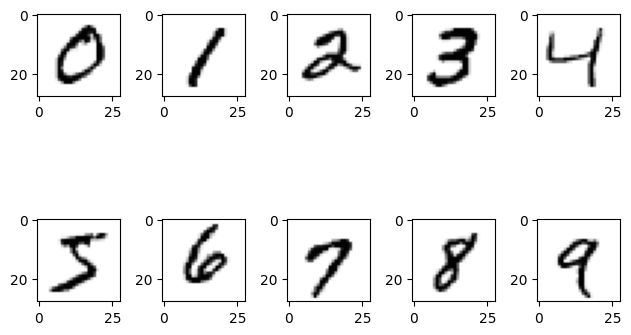

In [58]:
import matplotlib.pyplot as plt 
_, axes = plt.subplots(nrows=2, ncols=5)
axes = axes.flatten()
for i in range(10):
    image = x_train[y_train == i][0].reshape(28, 28)
    axes[i].imshow(image, cmap="Greys")
plt.tight_layout()

In [59]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
print(y_test_one_hot.shape)
print(y_test_one_hot)

(10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(20, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                15700     
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [61]:
from tensorflow.keras.optimizers import SGD
import time
sgd = SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
start_time = time.time()
history = model.fit(x_train, y_train_one_hot, epochs=50, validation_data=(x_test, y_test_one_hot))
end_time = time.time()
duration = end_time-start_time
print(f'Duration: {duration:.2f} sec')

Epoch 1/50


2023-04-02 17:47:32.322285: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6627 - acc: 0.8418 - val_loss: 0.3432 - val_acc: 0.9094
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3173 - acc: 0.9120 - val_loss: 0.2778 - val_acc: 0.9219
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2678 - acc: 0.9241 - val_loss: 0.2447 - val_acc: 0.9289
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2404 - acc: 0.9315 - val_loss: 0.2257 - val_acc: 0.9330
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2220 - acc: 0.9361 - val_loss: 0.2179 - val_acc: 0.9357
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2077 - acc: 0.9408 - val_loss: 0.2054 - val_acc: 0.9397
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1965 - acc: 0.9442 - val_loss: 0.1966 - val_acc: 0.9414
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - los

(0.8, 1.0)

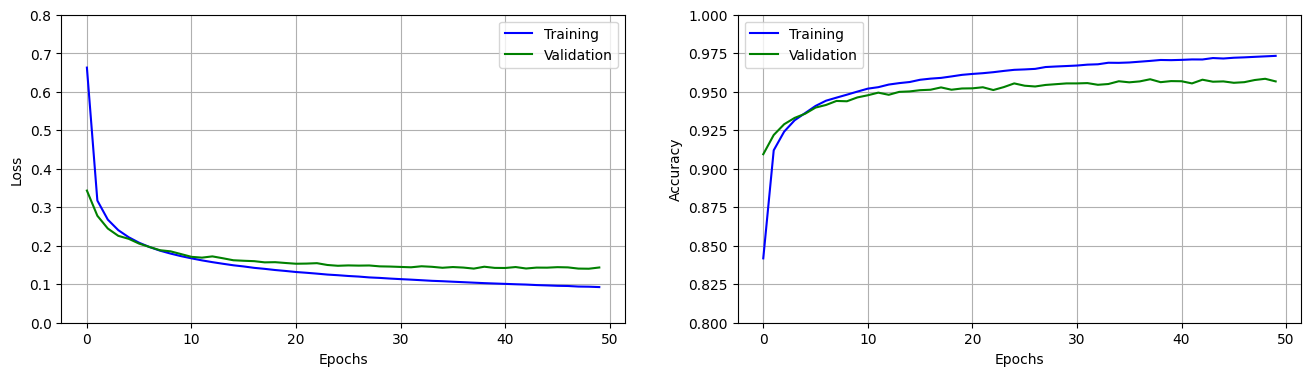

In [64]:
_, axes= plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
epochs = range(0, 50)
axes[0].plot(epochs, history.history['loss'], 'b', label='Training')
axes[0].plot(epochs, history.history['val_loss'], 'g', label='Validation')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()
axes[0].set_ylim([0, 0.8])
axes[1].plot(epochs, history.history['acc'], 'b', label='Training')
axes[1].plot(epochs, history.history['val_acc'], 'g', label='Validation')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid()
axes[1].set_ylim([0.8, 1])

In [65]:
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

313/313 [==============================] - 0s 916us/step - loss: 0.1435 - acc: 0.9567
Loss: 0.1435
Accuracy: 0.9567
